In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

## Lorenz Equations 
Forward Euler

### Background information on Lorenz63
Background information on Lorenz: [Lorenz63](https://en.wikipedia.org/wiki/Lorenz_system) 

Again we will start with a function that runs a forward model using Forward Euler. 


The forward Euler scheme for the Lorenz equations is as follows: 

(1)
\begin{equation}
x_{n+1} = x_n + \Delta t(\sigma(y_n -x_n))
\end{equation}
(2)
\begin{equation}
y_{n+1} = y_n + \Delta t(x_n\rho -z_n x_n - y_n)
\end{equation}
(3)
\begin{equation}
z_{n+1} = z_n + \Delta t(y_n x_n - \beta z_n)
\end{equation}

Below we will set the parameter values and define a function for Forward Euler.

### Forward Model Run and Variable Set Screws:


In [3]:
dt = 0.001   #tiny little time step... this has to be small because Forward Euler is Garbage for Lorenze 

#################
#Lorenz Parameters 
a = 10      #sigma 
B = 8/3     #beta 
r = 28      #rho 
#################

freq  = 8 #frequency of observations 

###############
#true values we start with and eventually want to assimilate towards
###############
xs = 1
ys = 1
zs = 2
############################################

#Forward Euler Function, Lorenz


def LOeuler(tstep,dt,xs,ys,zs,a,r,B):
    xval = np.zeros((tstep,1))
    yval = np.zeros((tstep,1))
    zval = np.zeros((tstep,1))
    xval[0,0]=xs 
    yval[0,0]=ys
    zval[0,0]=zs
    
    for ii in range(0,tstep-2):
        xval[ii+1,0] = xval[ii,0]+dt*(a*(yval[ii,0]-xval[ii,0]))
        yval[ii+1,0] = yval[ii,0]+dt*(r*xval[ii,0]-xval[ii,0]*zval[ii,0]-yval[ii,0])
        zval[ii+1,0] = zval[ii,0]+dt*(xval[ii,0]*yval[ii,0]-B*zval[ii,0])
    return xval,yval,zval,

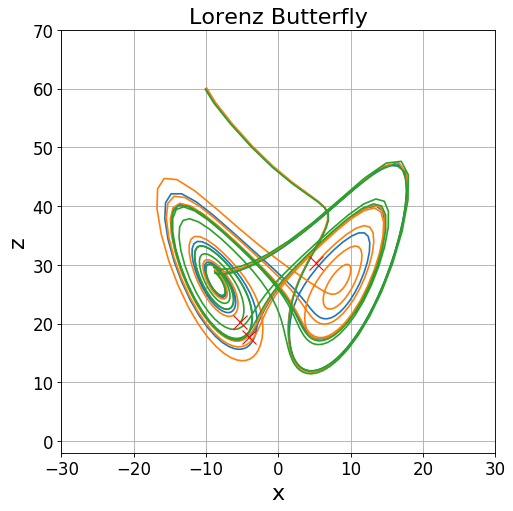

In [8]:
#we are launching 3 ensembles
################# comment or uncomment initial conditions: ###############
# chaotic regime
# xs1 = np.array([0.001,0.0001,20])
# xs2 = xs1+0.1
# xs3 = xs1-0.1

################# comment or uncomment initial conditions: ###############
# stable-ish regime
xs1 = np.array([-10,-4,60])
xs2 = xs1+0.1
xs3 = xs1-0.1
    
# medium:

fcast=400 #number of time steps
dt=0.2 # time step increment


for x in range(1,fcast):
    if x==0:
        time.sleep(1)
    clear_output(wait=True)

    Tx,Ty,Tz = LOeuler(x,0.02,xs1[0],xs1[1],xs1[2],a,r,B)
    Tx2,Ty2,Tz2 = LOeuler(x,0.02,xs2[0],xs2[1],xs2[2],a,r,B)
    Tx3,Ty3,Tz3 = LOeuler(x,0.02,xs3[0],xs3[1],xs3[2],a,r,B)

    # Tx = np.append(Tx,[Tx[-1]]);
    # Ty = np.append(Ty,[Ty[-1]]);
    # Tz = np.append(Tz,[Tz[-1]]);

    plt.figure(num=None, figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(Tx[:-1],Tz[:-1])
    plt.plot(Tx2[:-1],Tz2[:-1])
    plt.plot(Tx3[:-1],Tz3[:-1])
    
    
    if x>1:
        plt.plot(Tx[-2],Tz[-2],'rx',markersize=12)
        plt.plot(Tx2[-2],Tz2[-2],'rx',markersize=12)
        plt.plot(Tx3[-2],Tz3[-2],'rx',markersize=12)
    else:
        plt.plot(Tx[0],Tz[0],'rx',markersize=12)
        plt.plot(Tx2[0],Tz2[0],'rx',markersize=12)
        plt.plot(Tx3[0],Tz3[0],'rx',markersize=12)
          
    plt.xlabel('x',fontsize=20)
    plt.ylabel('z',fontsize=20)
    plt.title('Lorenz Butterfly',fontsize=20)
    plt.xlim([-30,30])
    plt.ylim([-2,70])
    plt.grid(True)

    plt.xticks(fontsize=15, rotation=0)
    plt.yticks(fontsize=15, rotation=0)
    plt.show()
    
    
    if x==1:
        time.sleep(3)
    else:
        time.sleep(0.000001)